In [50]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score

In [57]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.target
print(df.head())
df

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


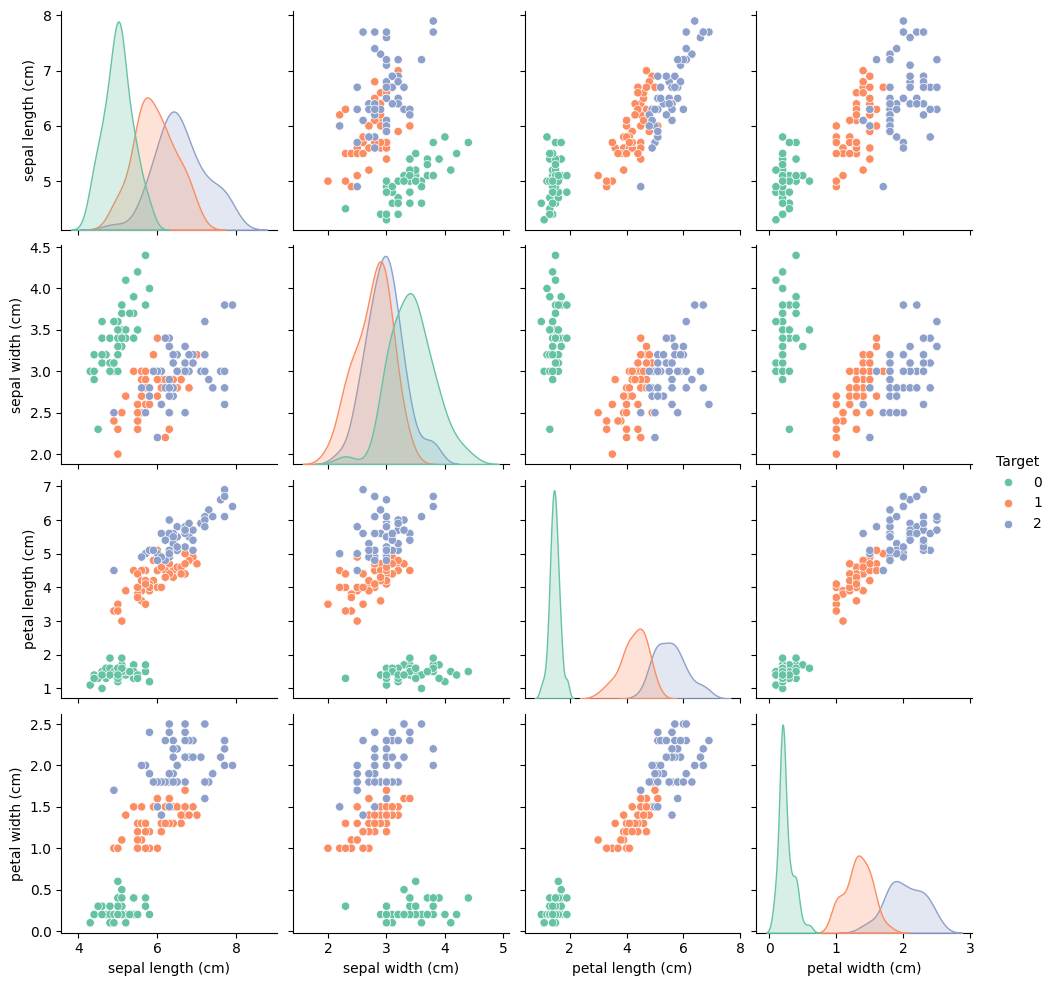

In [52]:
# Trovata matrice per visualizzare confronto di ogni caratterstica con le altre, evidenziando i colori
sns.pairplot(df, hue='Target', palette='Set2')
plt.show()

In [53]:
scaler = StandardScaler()

X = iris.data  
y = iris.target  
X_scaled = scaler.fit_transform(X)

In [54]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10, max_iter=300, random_state=42)

In [55]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [56]:
y_kmeans = kmeans.predict(X_scaled)
print(y_kmeans)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [59]:
predizioni =list(y_kmeans)
reali = list(y)
predizioni_cambiate = []
for pred in predizioni:
    if pred == 1:
        predizioni_cambiate.append(0)
    elif pred == 0:
        predizioni_cambiate.append(1)
    else:
        predizioni_cambiate.append(2)
   
        
count = 0
for i in range (len(reali)):
    if predizioni_cambiate[i]== reali[i]:
        count += 1
print(count,len(reali))
count/len(reali)

125 150


0.8333333333333334

In [43]:
# Se tende a 1 indica corrispondenza tra cluster ed etichette reali
adjusted_score = adjusted_rand_score(y, y_kmeans)

# Indica omogeinità di ogni singola classe
homogeneity = homogeneity_score(y, y_kmeans)

print(adjusted_score,homogeneity)

0.6201351808870379 0.659126501804901
